<a href="https://colab.research.google.com/github/Naga-Bharat/Food-Vision-/blob/main/Part_2_Fine_tuning_(Transfer_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.14.0


In [2]:
!nvidia-smi

Tue Oct 24 05:40:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-24 05:40:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-24 05:40:21 (76.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves,unzip_data,walk_through_dir

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-10-24 05:40:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   199MB/s    in 0.8s    

2023-10-24 05:40:23 (199 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [7]:
train_dir= "10_food_classes_10_percent/train"
test_dir='10_food_classes_10_percent/test'

In [8]:

import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical',
                                                                          batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical',
                                                                          batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 69.97194     51.212532    26.333067  ]
   [ 82.98007     58.46365     32.13106   ]
   [ 96.47497     64.31888     35.620056  ]
   ...
   [139.58054     81.580536    33.580532  ]
   [136.92856     78.92856     30.928558  ]
   [136.09328     78.093285    30.09328   ]]

  [[ 85.40625     56.43367     28.789381  ]
   [ 94.678734    61.681126    33.826214  ]
   [ 97.39907     59.43527     29.794641  ]
   ...
   [139.16788     81.16787     33.167873  ]
   [136.20105     78.20105     30.20105   ]
   [137.14066     79.14066     31.14066   ]]

  [[ 94.064415    55.841198    26.535395  ]
   [ 98.97226     58.749043    27.44324   ]
   [ 99.07972     57.105072    24.130419  ]
   ...
   [141.52007     83.520065    35.52007   ]
   [136.28395     78.28396     30.283957  ]
   [136.80171     78.801704    30.801706  ]]

  ...

  [[ 72.337074    60.33707     44.33707   ]
   [ 73.92857     61.928574    45.928574  ]
   [ 77.06553     64.06553     47.065525  ]
   ...
   [135.51819    128.732

In [11]:
print(type(train_data_10_percent))


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [12]:
from keras.src.optimizers import Adam
# model 0
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# freeze the base model\
base_model.trainable=False

# create inputs
inputs=tf.keras.layers.Input(shape=(224,224,3), name ='input_layer_bharu')

#   if using resnet50v2 you will need to noramlize inputs
# x =tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)

# pass the inputs to the base model
x=base_model(inputs)
print(f'shape after passing inputs through base model :{x.shape}')

# average pool the outputs (agrgregate )
x=tf.keras.layers.GlobalAveragePooling2D(name ='global_avrage_pooling_laayer')(x)
print(f'shape after gloabal avfpool2d:{x.shape}')

outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer_bhary')(x)
model_0=tf.keras.Model(inputs,outputs)


model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
h0=model_0.fit(train_data_10_percent,
               epochs=5,
               steps_per_epoch=len(train_data_10_percent),
               validation_data=test_data,
               validation_steps=int(0.25*len(test_data)),
               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='10_percent feauture extraction')])

16705208/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model :(None, 7, 7, 1280)
shape after gloabal avfpool2d:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent feauture extraction/20231024-054043
Epoch 1/5
24/24 [==============================] - 20s 245ms/step - loss: 1.8749 - accuracy: 0.4093 - val_loss: 1.3157 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 5s 174ms/step - loss: 1.1099 - accuracy: 0.7533 - val_loss: 0.8774 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 5s 180ms/step - loss: 0.7962 - accuracy: 0.8227 - val_loss: 0.6997 - val_accuracy: 0.8273
Epoch 4/5
24/24 [==============================] - 4s 143ms/step - loss: 0.6547 - accuracy: 0.8427 - val_loss: 0.6135 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 5s 182ms/step - loss: 0.5464 - accuracy: 0.8800 - val_loss: 0.5780 - val_accuracy: 0.8438


In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.5573 - accuracy: 0.8572


[0.5573359131813049, 0.857200026512146]

In [14]:
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_bharu (InputLa  [(None, 224, 224, 3)]     0         
 yer)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avrage_pooling_laay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer_bhary (Dense)  (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.

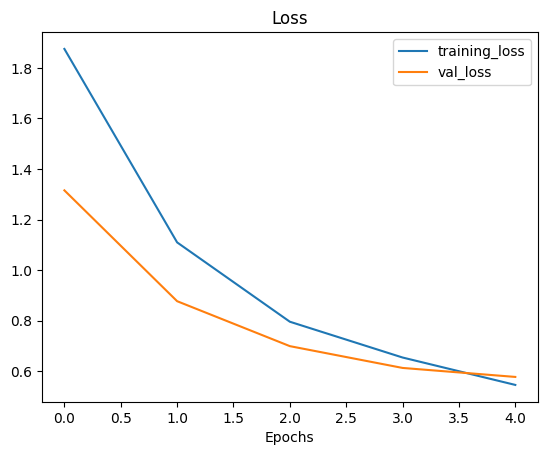

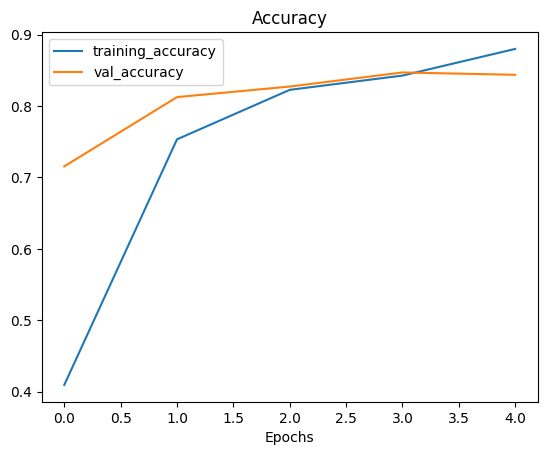

In [17]:
plot_loss_curves(h0)

In [18]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
global_average_pool_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pool_tensor.shape

TensorShape([1, 3])

In [19]:
# it is ssamws reduce_mean
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [20]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")
train_dir_1_percent="10_food_classes_1_percent/train/"
test_dir='10_food_classes_1_percent/test/'

--2023-10-24 05:41:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 108.177.111.207, 172.253.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   214MB/s    in 0.6s    

2023-10-24 05:41:37 (214 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [22]:
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode='categorical',
                                                                         image_size=(224,224))
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=(224,224))


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation=keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),

],name = 'data_augmentation')


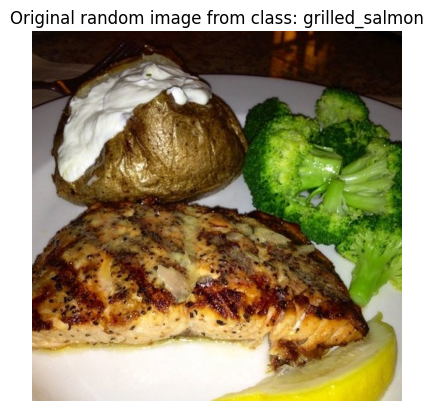

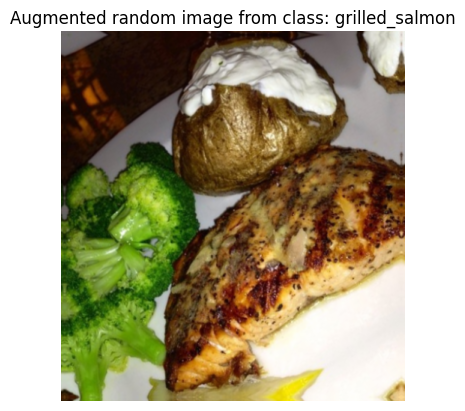

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [25]:
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=(224,224,3),name='inpiut layer')
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=layers.GlobalAveragePooling2D(name='reduce_mean')(x)
outputs=layers.Dense(10,activation='softmax',name='outpput_layer')(x)
model_1=keras.Model(inputs,outputs)
model_1.compile(loss ='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

24274472/24274472 [==============================] - 0s 0us/step


In [26]:
h_1_percent=model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('transfer_learnings','1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learnings/1_percent_data_aug/20231024-054144
Epoch 1/5
3/3 [==============================] - 22s 7s/step - loss: 2.3137 - accuracy: 0.1714 - val_loss: 2.2252 - val_accuracy: 0.1776
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1518 - accuracy: 0.2000 - val_loss: 2.1040 - val_accuracy: 0.2608
Epoch 3/5
3/3 [==============================] - 8s 3s/step - loss: 1.9526 - accuracy: 0.3714 - val_loss: 1.9972 - val_accuracy: 0.3376
Epoch 4/5
3/3 [==============================] - 8s 3s/step - loss: 1.8243 - accuracy: 0.4714 - val_loss: 1.9040 - val_accuracy: 0.3924
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.7282 - accuracy: 0.5714 - val_loss: 1.8252 - val_accuracy: 0.4360


In [27]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inpiut layer (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 reduce_mean (GlobalAverage  (None, 1280)              0         
 Pooling2D)                                                      
                                                                 
 outpput_layer (Dense)       (None, 10)                12810     
                                                           

In [28]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug


79/79 [==============================] - 5s 62ms/step - loss: 1.8252 - accuracy: 0.4360


[1.825171709060669, 0.4359999895095825]

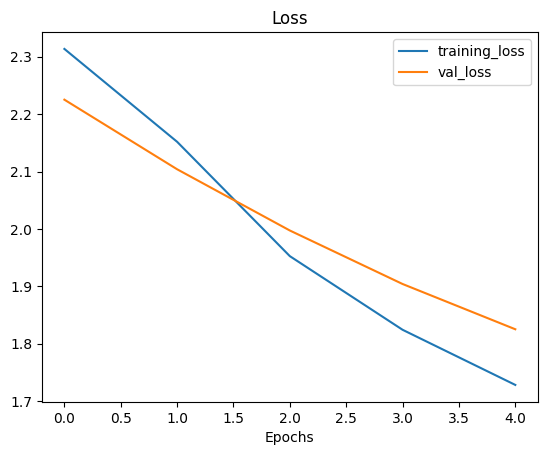

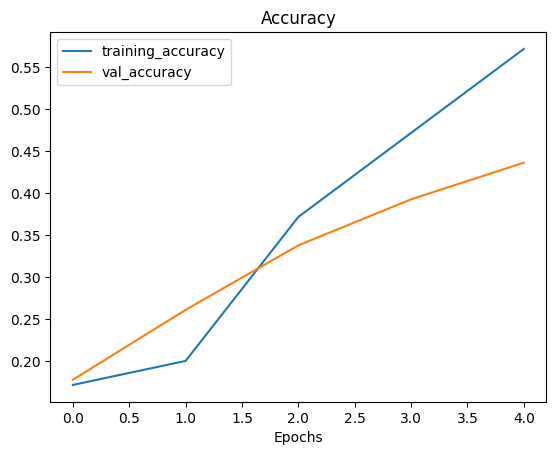

In [29]:
plot_loss_curves(h_1_percent)


In [30]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [31]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
], name ="data_augmentation")
base_model=keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
outputs=layers.Dense(10,activation='Softmax',name ='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])



checkpoint_path= 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq='epoch',
                                                       verbose=1)



initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9688 - accuracy: 0.3627
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 727ms/step - loss: 1.9688 - accuracy: 0.3627 - val_loss: 1.4095 - val_accuracy: 0.6957
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3200 - accuracy: 0.6773
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 667ms/step - loss: 1.3200 - accuracy: 0.6773 - val_loss: 0.9725 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0001 - accuracy: 0.7707
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 506ms/step - loss: 1.0001 - accuracy: 0.7707 - val_loss: 0.8004 - val_accuracy: 0.8158
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.

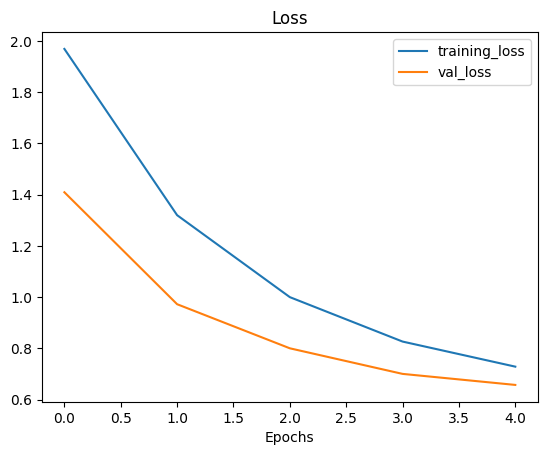

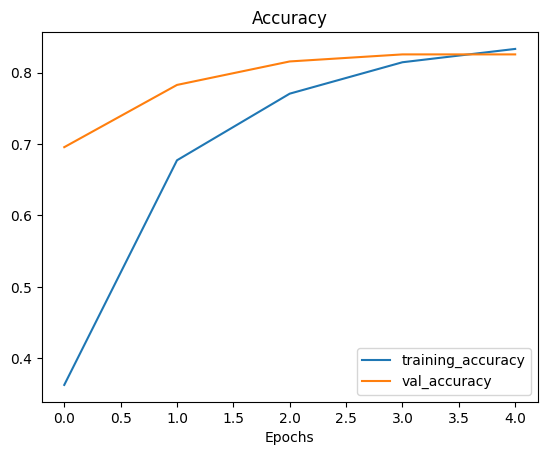

In [33]:
plot_loss_curves(history_10_percent_data_aug)

In [34]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)



79/79 [==============================] - 8s 86ms/step - loss: 0.6217 - accuracy: 0.8448


In [37]:
model_2.layers

In [38]:
# model 3 Fine-tuning an existing model on 10% of the data
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")



Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7e95d0434790> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7e9558c55720> | Trainable? True
Layer number: 2 | Layer name: efficientnetb0 | Layer type: <keras.src.engine.functional.Functional object at 0x7e954a38a260> | Trainable? False
Layer number: 3 | Layer name: global_avg_pooling | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e9558aa92d0> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7e9558aa8700> | Trainable? True


In [39]:

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling (Global  (None, 1280)              0         
 AveragePooling2D)                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [40]:
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetb0'

In [41]:
print(len(model_2_base_model.trainable_variables)) # layer at index 2 is the EfficientNetV2B0 layer (the base model)

0


In [42]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_3 False
2 normalization_2 False
3 rescaling_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [43]:
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])


In [44]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)



0 input_3 False
1 rescaling_3 False
2 normalization_2 False
3 rescaling_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [45]:
print(len(model_2.trainable_variables))

12


In [46]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231024-054915
Epoch 5/10
24/24 [==============================] - 23s 538ms/step - loss: 0.6064 - accuracy: 0.8347 - val_loss: 0.5344 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 10s 419ms/step - loss: 0.4994 - accuracy: 0.8547 - val_loss: 0.5051 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 14s 584ms/step - loss: 0.4335 - accuracy: 0.8680 - val_loss: 0.4765 - val_accuracy: 0.8289
Epoch 8/10
24/24 [==============================] - 10s 417ms/step - loss: 0.3914 - accuracy: 0.8867 - val_loss: 0.4933 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 9s 378ms/step - loss: 0.3683 - accuracy: 0.8840 - val_loss: 0.4587 - val_accuracy: 0.8520
Epoch 10/10
24/24 [==============================] - 9s 370ms/step - loss: 0.3006 - accuracy: 0.9120 - val_loss: 0.4398 - val_accuracy: 0.8536


In [47]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()


5
11
[0.36266666650772095, 0.6773333549499512, 0.7706666588783264, 0.8146666884422302, 0.8333333134651184, 0.8346666693687439, 0.8546666502952576, 0.8679999709129333, 0.8866666555404663, 0.8840000033378601, 0.9120000004768372]


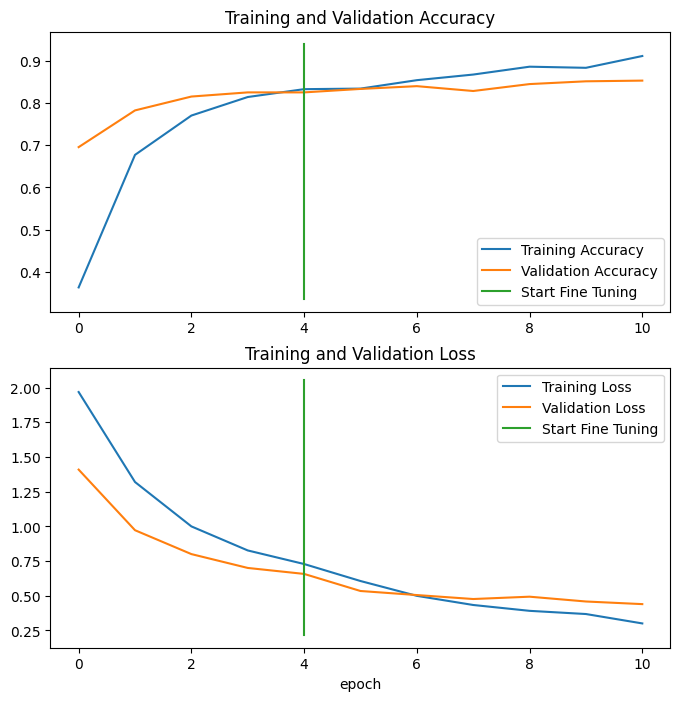

In [48]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

In [49]:
# model 4

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-10-24 05:54:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.145.207, 172.217.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  46.5MB/s    in 10s     

2023-10-24 05:54:46 (48.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [51]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [52]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.4311 - accuracy: 0.8552


[0.4310932159423828, 0.8551999926567078]

In [54]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:


    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

# Create an instance of model_2 with our new function
model_2 = create_base_model()

In [55]:
# Create a new instance of model_2 for Experiment 4
model_2 = create_base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tuning

In [57]:

model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [58]:

# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 9s 63ms/step - loss: 2.3552 - accuracy: 0.1384


[2.355243444442749, 0.13840000331401825]

In [59]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [60]:

# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [61]:

# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_6 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [62]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [67]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20231024-060840
Epoch 5/10
235/235 [==============================] - 46s 192ms/step - loss: 0.4751 - accuracy: 0.8428 - val_loss: 0.3624 - val_accuracy: 0.8882
Epoch 6/10
235/235 [==============================] - 44s 186ms/step - loss: 0.4579 - accuracy: 0.8496 - val_loss: 0.3206 - val_accuracy: 0.9112
Epoch 7/10
235/235 [==============================] - 43s 183ms/step - loss: 0.4384 - accuracy: 0.8565 - val_loss: 0.3120 - val_accuracy: 0.9046
Epoch 8/10
235/235 [==============================] - 44s 184ms/step - loss: 0.4180 - accuracy: 0.8592 - val_loss: 0.3081 - val_accuracy: 0.9013
Epoch 9/10
235/235 [==============================] - 40s 168ms/step - loss: 0.4123 - accuracy: 0.8649 - val_loss: 0.2996 - val_accuracy: 0.9128
Epoch 10/10
235/235 [==============================] - 36s 153ms/step - loss: 0.3890 - accuracy: 0.8736 - val_loss: 0.3294 - val_accuracy: 0.9013


In [68]:

results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 66ms/step - loss: 0.2859 - accuracy: 0.9040


[0.2858660817146301, 0.9039999842643738]

5
11
[0.36266666650772095, 0.6773333549499512, 0.7706666588783264, 0.8146666884422302, 0.8333333134651184, 0.8428000211715698, 0.8496000170707703, 0.8565333485603333, 0.8592000007629395, 0.8649333119392395, 0.8736000061035156]


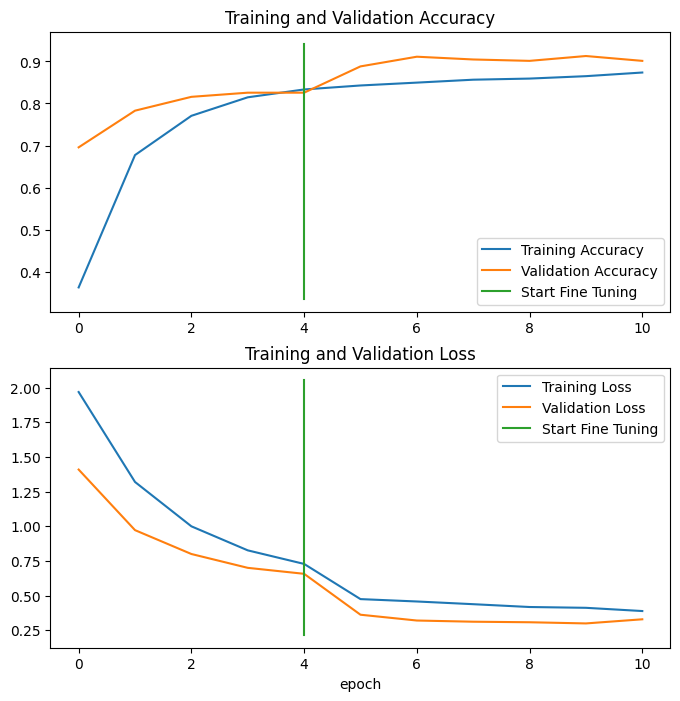

In [69]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)